# Homework 4 - Andrea Lazzari


1) Generate a random a $SxS$ matrix with $C$ non zero entries and $1-C$ zeros ($C$ is between zero and one). Set the diagonal to $-d$. The non-zero elements are drawn  from a given distributions. 
Calculate the eigenvalues. Repeat different realizations and plot all the eigenvalues in the complex plane [Real part (x-axis) and imaginary part (y-axis)]. Compare this result with the expectations from the circular law. 

1) Generate the same as above but for mutualistic structure and find how the maximum real eigenvalues scales with $S$ (use $S=20,30,40,...,100$) and compares your numerical finding with the analytical expectations. 

2) Analyse the food web using the metrics we have seen in class. The file represent the weighted adjacency matrix of the food web. For the analysis you can binarize (zero and one) the matrix. 
You find the file in the google drive.

4) Optional: calculate the same as 1) but with for the cascade model or for the nested mutualistic network. You follow detailed step by step explanation in the "Homework-detail-week3-from-Allesina-Stability-Criteria-2012-Nature.pdf" (also uploaded in the Google Drive, note folder)

---

## Circular law

Given a $ S x S$ matrix not symmetric random matrix $M = \{m_{ij}\}\rvert_{i,j=1,\dots,S}$ whose entries are independent and identically distributed (i.i.d.) random variables with zero mean 
$ \mathbb{E}(m_{ij}) = 0$ and variance $\sigma^2_{m_{ij}} = 1$, the circular law states that the eigenvalues of $\dfrac{M}{\sqrt{S}}$ are distributed uniformly on the unitary disk in the complex plane.

---

### Random Matrix - Symmetric case 

In the random case, we construct the matrices in the following way: 
*  For each off-diagonal coefficient $\big(M_{ij}\big)\rvert_{i \neq j}$ , we draw a random value $p$ from a uniform distribution $\mathcal{U}[0, 1]$. 
*  If the value is $p \leq C$, we set coefficient $M_{ij}$ by sampling it from $\mathcal{N}(0, \sigma^2)$.
*  Otherwise $p > C$ , $M_{ij} = 0$.
* All diagonal terms, $M_{ii}$, are set to $−d$. 

These matrices, for large $S$, generate a precise mixture of interaction types, with predator-prey interactions being represented twice as frequently as mutualistic or competitive ones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def random_matrix(S, C, d , pdf , parameters):
    # Generate a random a SxS matrix with non zero entries with probability of C 
    # with diagonal equal to -d
    
    #S : size of the matrix
    #C : probability of non zero entries
    #d : (-)diagonal value
    #pdf : probability distribution function (NumPy)
    #parameters : parameters of the pdf (Dict)
    
    # Generate a random a SxS matrix from probability distribution pdf(parameters)
    mat = pdf(size=(S,S), **parameters)
    
    # Set diagonal to -d
    np.fill_diagonal(mat, -d)
    
    # Set the off-diagonal non zero entries to zero with a probability of 1-C
    mat[np.triu(np.random.uniform(size = (S, S)), k = 1) > C]=0
    mat[np.tril(np.random.uniform(size = (S, S)), k = -1) > C]=0
    
    
    return mat

In [3]:
S = 100      #dimension of the matrix
C = 0.72     #probability of non zero entries
d = 2        #diagonal value d

std = 1      #standard deviation of the normal distribution

dist = np.random.normal
par = {'loc': 0, 'scale' : std}      # parameters of the normal pdf

repetitions = 1000    #number of repetitions

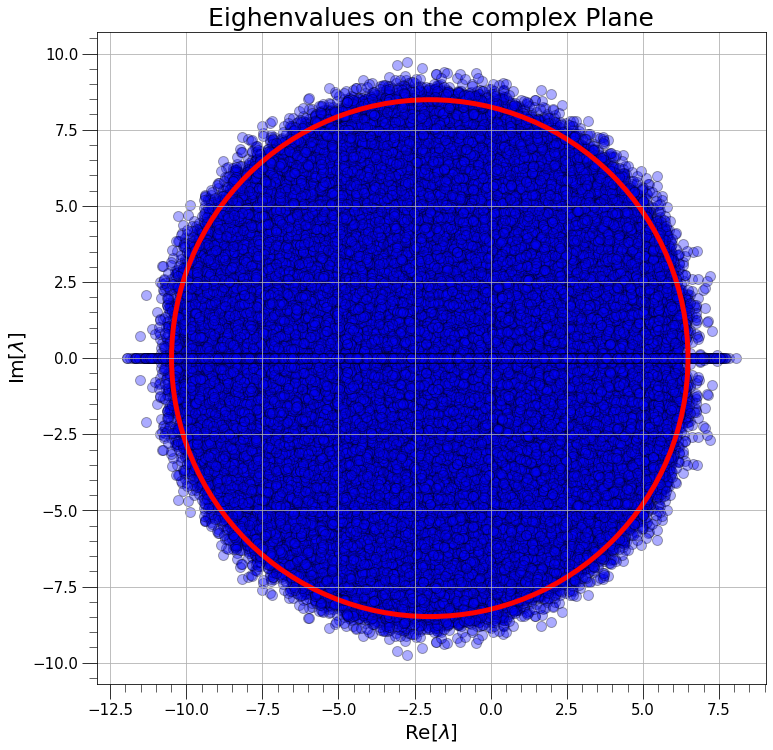

In [4]:

circle = plt.Circle((-d,0), np.sqrt(S*C*std**2), color='red', fill=False, linewidth=5)  

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for i in range(repetitions):

    r_mat = random_matrix(S , C , d , dist , parameters=par)    #random SxS matrix 

    eighenvalues, _ = np.linalg.eig(r_mat)
    ax.scatter(np.real(eighenvalues), np.imag(eighenvalues), s=100, edgecolors='black', color='blue', alpha=0.33)
    

ax.add_patch(circle)
ax.set_title('Eighenvalues on the complex Plane', fontsize = 25)    
ax.set_xlabel('Re[$\\lambda$]', fontsize = 20)
ax.set_ylabel('Im[$\\lambda$]', fontsize = 20)         


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

As we expected from the **Circular Law**, from this plot we can see that the eigenvalues are distributed in a disk (the red line) with radius $$ r = \sqrt{S \cdot C \cdot \sigma^2} $$

## Mutualistic Case

Here we introduced correlations between each species.
Analytically we found that the eighenvalues of the matrix are distributed on an ellipse with semi-axis dependent on the number of species $S$ and the correlation coefficient $\rho$:
$$ \begin{cases}
 a = \sqrt{S \cdot V} \cdot (1 + \rho) \\
 b = \sqrt{S \cdot V}\cdot (1 - \rho) \\

\end{cases}$$


Having defined as $V = Var(M_{ij})$ and $\rho = \dfrac{\mathbb{E}[M_{ij}, M_{ji}] - \mathbb{E}^2[M_{ij}]}{Var(M_{ij})}$

### Random Matrix - Mutualistic Case
*  For each pair of interactions $\big(M_{ij}, M_{ji} \big)\rvert_{i > j}$ , we draw a random value $p$ from a uniform distribution $\mathcal{U}[0, 1]$. 
*  If the value is $p \leq C$, we draw $M_{ij}$ and $M_{ji}$ independently from a half-normal distribution $ |x| \sim |\mathcal{N}(0, \sigma^2)|$.
*  Otherwise $p > C$ , $M_{ij} = 0 \quad \text{and} \quad M_{ji} = 0$.
* All diagonal terms, $M_{ii}$, are set to $−d$. 


Therefore, in order to compute $\mathbb{E}[M_{ij}]$, we notice that in our case it is $C \cdot \mathbb{E}[|x|]$ which is the first moment of the distribution:

$$ \mathbb{E}[|x|] = \int_{-\infty}^{+\infty} |x| \cdot P(x) dx = \int_{-\infty}^{+\infty} dx \quad |x| \cdot \dfrac{1}{\sqrt{2\pi\sigma^2}} \cdot e^\frac{(x-0)^2}{2\sigma^2} = \dfrac{2}{\sqrt{2\pi\sigma^2}} \cdot \int_{0}^{+\infty} dx \quad |x| \cdot  e^\frac{x^2}{2\sigma^2} $$

With some algebraic manipulation we can find that:

$$ \mathbb{E}[|x|] = \dfrac{2 \sigma}{\sqrt{2\pi}} \quad \rightarrow \quad \boxed{\mathbb{E}[M_{ij}] = C \cdot \dfrac{2 \sigma}{\sqrt{2\pi}}}$$

Similarly, $ \boxed{ \mathbb{E}[M_{ij}, M_{ji}] = C ^2 \cdot \mathbb{E}^2[|x|] }$


Consequentiallly, we have that:

$$\rho = \dfrac{\mathbb{E}[M_{ij}, M_{ji}] - \mathbb{E}^2[M_{ij}]}{Var(M_{ij})} \quad \rightarrow \quad \boxed{\rho = 0}$$

We can also compute the variance of the matrix $M_{ij}$:

$$V = Var(M_{ij}) = \mathbb{E}[M_{ij}^2] - \mathbb{E}^2[M_{ij}] = C \cdot \sigma^2 - C^2 \cdot \dfrac{2 \sigma^2}{\pi} \quad \rightarrow \quad \boxed{ Var(M_{ij}) = C \cdot \sigma^2 \bigg( 1 - \dfrac{2C}{\pi} \bigg)}$$

Having the correlation coefficient $\rho = 0$, this mutualistic case is similar to the previous one, but now with a different variance $V$. 

In fact the semi-axis of the ellipse are:
$$
\begin{cases}
 a = \sqrt{S \cdot V} \cdot (1 + 0)  \quad \rightarrow \quad  a = \sqrt{S \cdot V}\\
 b = \sqrt{S \cdot V}\cdot (1 - 0)  \quad \rightarrow \quad b = \sqrt{S \cdot V} \\
\end{cases}
 $$

Therefore, the eighenvalues are distributed on a disk with radius $r = \sqrt{S \cdot V}$.


The mean of the distribution is not zero, but it is $C \cdot \mathbb{E}[|x|]$, this lead to an eighenvalue that is a sort of "outlier" at 
$$
Re (\lambda) = (S-1) \cdot C \cdot \mathbb{E}[|x|] = (S-1) \cdot C \cdot \dfrac{2 \sigma}{\sqrt{2\pi}}
$$.

In [5]:
def random_matrix_mutualistic(S, C, d , pdf , parameters):
    # Generate a random a SxS matrix with non zero entries with probability of C 
    # with diagonal equal to -d
    
    #S : size of the matrix
    #C : probability of non zero entries
    #d : (-)diagonal value
    #pdf : probability distribution function (NumPy)
    #parameters : parameters of the pdf (Dict)
    
    # Generate a random a SxS matrix from probability distribution pdf(parameters)
    mat = pdf(size=(S,S), **parameters)
    mat = np.abs(mat)
    
    
    # Set diagonal to -d
    np.fill_diagonal(mat, -d)
    
    # Set the off-diagonal non zero entries to zero with a probability of 1-C
    mat[np.triu(np.random.uniform(size = (S, S)), k = 1) > C]=0
    mat[np.tril(np.random.uniform(size = (S, S)), k = -1) > C]=0
    
    
    return mat

In [6]:
S = 100      #dimension of the matrix
C = 0.72     #probability of non zero entries
d = 2        #diagonal value d

std = 1      #standard deviation of the normal distribution

dist = np.random.normal
par = {'loc': 0, 'scale' : std}      # parameters of the normal pdf

realizations = 1000    #number of repetitions


In [17]:
print(f'We expect the system to be unstable as the real part of the "outlier" eigenvalue is: \
      {C * (S - 1) * ((2 * std) / (np.sqrt(2 * np.pi))) - d:.3f}') 

print(f'\nThe expected center is : ( {-d - C * (2 * std)/ np.sqrt(2 * np.pi):.3f} , 0 )')

We expect the system to be unstable as the real part of the "outlier" eigenvalue is:       54.873

The expected center is : ( -2.574 , 0 )


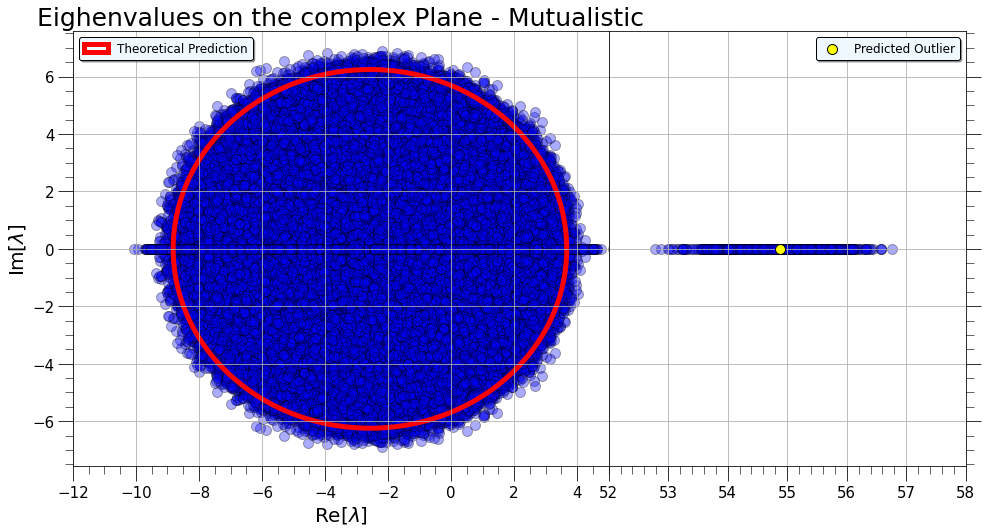

In [23]:
V = C * std**2 * (1 - (2*C)/ np.pi)
circle = plt.Circle(( -d - C * (2 * std)/ np.sqrt(2 * np.pi) , 0), np.sqrt(S * V), color='red', fill=False, linewidth=5, 
                        label='Theoretical Prediction')  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8), sharey=True, gridspec_kw={'wspace': 0, 'width_ratios': [3, 2]})
ax1.set_xlim(-12, 5)
ax2.set_xlim(52, 58)
ax2.yaxis.tick_right()

for i in range(repetitions):

    r_mat = random_matrix_mutualistic(S , C , d , dist , parameters=par)    #random SxS matrix - mutualistic case

    eighenvalues, _ = np.linalg.eig(r_mat)
    
    ax1.scatter(np.real(eighenvalues), np.imag(eighenvalues), s=100, edgecolors='black', color='blue', alpha=0.33)
    ax2.scatter(np.real(eighenvalues), np.imag(eighenvalues), s=100, edgecolors='black', color='blue', alpha=0.33)

ax1.add_patch(circle)
ax2.scatter(C * (S - 1) * ((2 * std) / (np.sqrt(2 * np.pi))) - d, 0, edgecolor = 'black',
            color = 'yellow', s = 100, zorder = 3, label='Predicted Outlier')

ax1.set_title('Eighenvalues on the complex Plane - Mutualistic', fontsize = 25)    
ax1.set_xlabel('Re[$\\lambda$]', fontsize = 20)
ax1.set_ylabel('Im[$\\lambda$]', fontsize = 20)         

for ax in [ax1,ax2]:
    ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True, fontsize = 12)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
    ax.tick_params(axis='both', which='major', labelsize=15, length=15)
    ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
    
    ax.grid(zorder = 1)
    ax.minorticks_on()


## Scaling of the Maximum Eighenvalue

In this part we will study the scaling of the maximum real eighenvalue $\lambda_{max}$ with different number of species $S = [20 , \dots, 100]$.

The condition:

$$ max \big\{ \sqrt{S \cdot V} \cdot (1 \pm \rho) - C \mu -d \quad , \quad (S-1) \cdot C \mu - d \big\} $$

due to the correlation coefficient $\rho = 0$ in the considered mutualistic framework becomes:

$$ max \bigg\{ \sqrt{S \cdot V} \quad , \quad S \cdot C \mu \bigg\} \quad \rightarrow \quad  
   max \bigg\{ \sqrt{S \cdot C \cdot \sigma^2 \bigg( 1 - \dfrac{2C}{\pi}\bigg)} \quad , \quad S \cdot C^2 \cdot \dfrac{2 \sigma}{\sqrt{2\pi}}  \bigg\}
$$


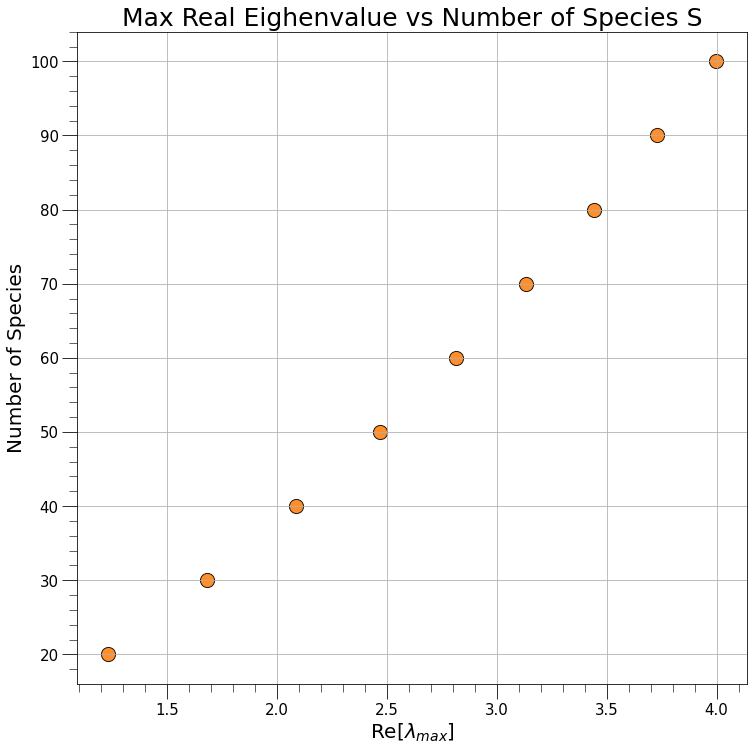

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

max_eig_list = []

for S in range(20,101,10):
      for i in range(repetitions):

            r_mat = random_matrix(S , C , d , dist , parameters=par)    #random SxS matrix 

            eighenvalues, _ = np.linalg.eig(r_mat)
            
            max_eig_list.append(np.max(np.real(eighenvalues)))
            
      ax.scatter(np.mean(max_eig_list), S, s=200, edgecolors='black', color='C1', alpha=0.88)
    

ax.set_title('Max Real Eighenvalue vs Number of Species S', fontsize = 25)    
ax.set_xlabel('Re[$\\lambda_{max}$]', fontsize = 20)
ax.set_ylabel('Number of Species', fontsize = 20)         


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

